In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
#Read the Data and set first column as index
os.chdir("D:/Python")
df = pd.read_csv("day.csv", index_col = 0)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Explore the data types of all the variables
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
#Drop these two variables as they are basically the breakup for count variable which we have to predict
df = df.drop(['casual','registered'], axis = 1)

<h1>Missing Value Analysis</h1>

In [5]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


<h1>Outlier Analysis</h1>

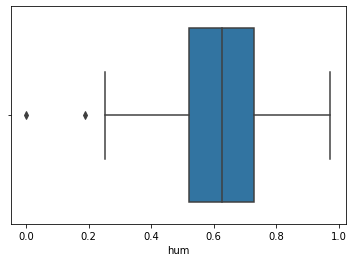

In [6]:
sns.boxplot(df['hum'])

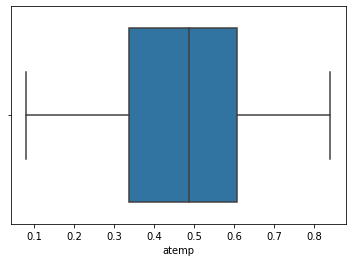

In [7]:
sns.boxplot(df['atemp'])

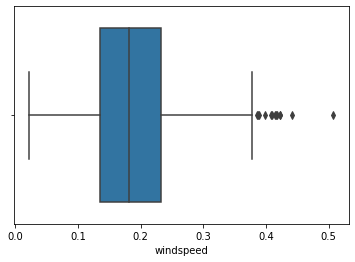

In [8]:
sns.boxplot(df['windspeed'])

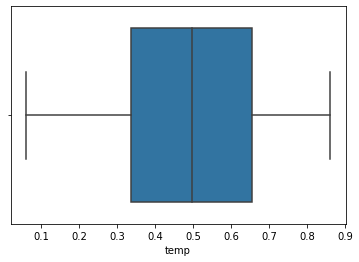

In [9]:
sns.boxplot(df['temp'])

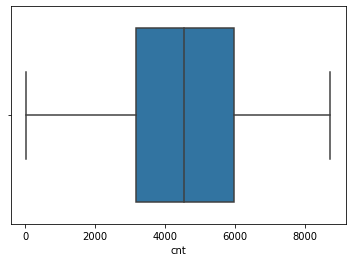

In [10]:
sns.boxplot(df['cnt'])

In [11]:
#Convert the outlier value to NA and then replace them with the mean
outliers =  ["hum", "windspeed"]

for i in outliers:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    df.loc[df[i] > maximum, i] = np.nan
    df.loc[df[i] < minimum, i] = np.nan
    df[i].fillna(df[i].mean(skipna = True), inplace = True)

<h1>Feature Engineering</h1>

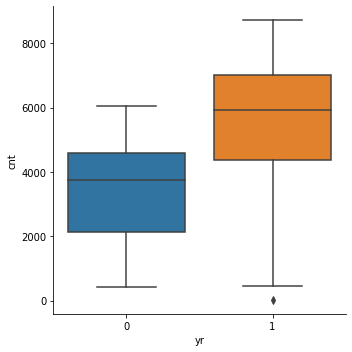

In [12]:
sns.catplot(x="yr", y="cnt", kind="box", data=df)

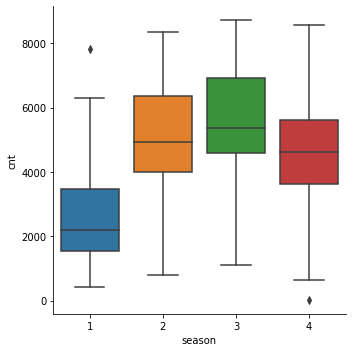

In [13]:
sns.catplot(x="season", y="cnt", kind="box", data=df)

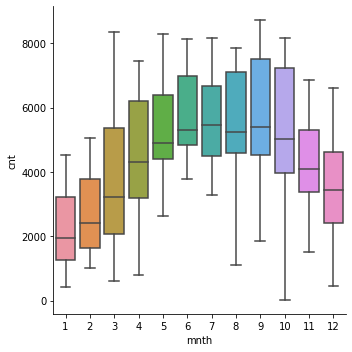

In [14]:
sns.catplot(x="mnth", y="cnt", kind="box", data=df)

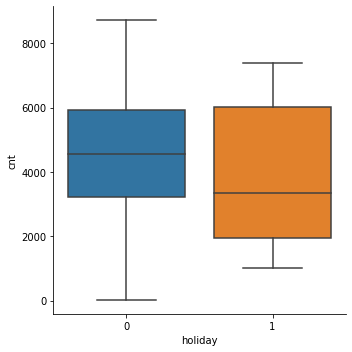

In [15]:
sns.catplot(x="holiday", y="cnt", kind="box", data=df)

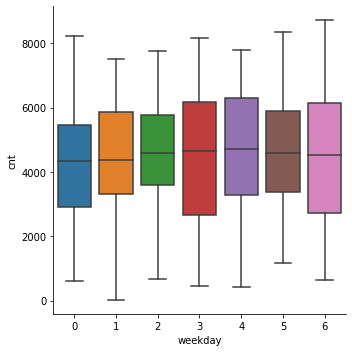

In [16]:
sns.catplot(x="weekday", y="cnt", kind="box", data=df)

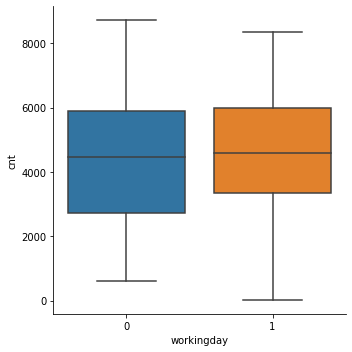

In [17]:
sns.catplot(x="workingday", y="cnt", kind="box", data=df)

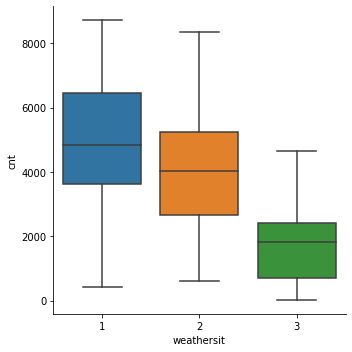

In [18]:
sns.catplot(x="weathersit", y="cnt", kind="box", data=df)

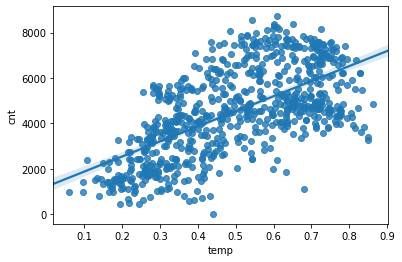

In [19]:
sns.regplot(x = 'temp', y="cnt",data=df)

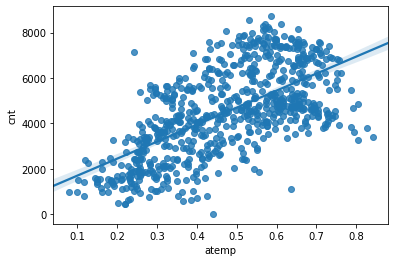

In [20]:
sns.regplot(x = 'atemp', y="cnt",data=df)

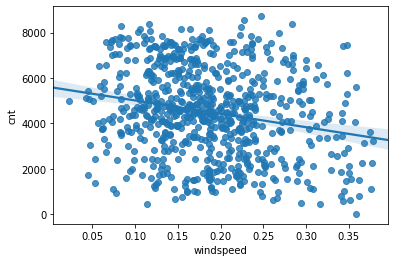

In [21]:
sns.regplot(x = 'windspeed', y="cnt",data=df)

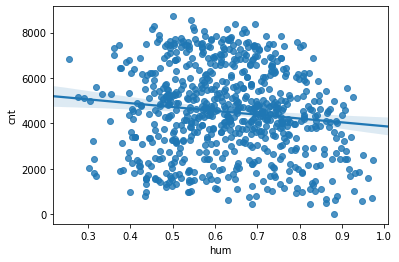

In [22]:
sns.regplot(x = 'hum', y="cnt",data=df)

Text(0, 0.5, 'frequency')

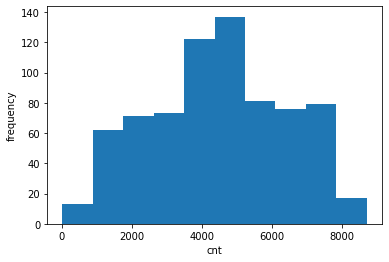

In [23]:
plt.hist(df['cnt'])
plt.xlabel('cnt')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

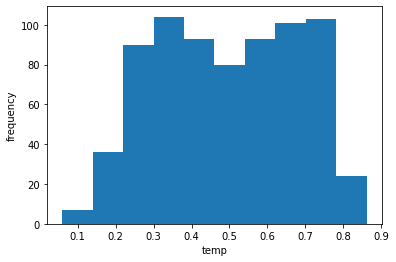

In [24]:
plt.hist(df['temp'])
plt.xlabel('temp')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

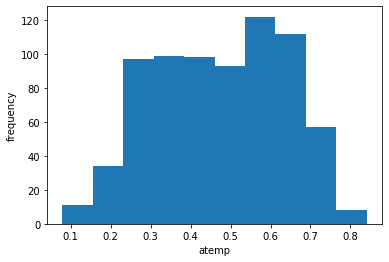

In [25]:
plt.hist(df['atemp'])
plt.xlabel('atemp')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

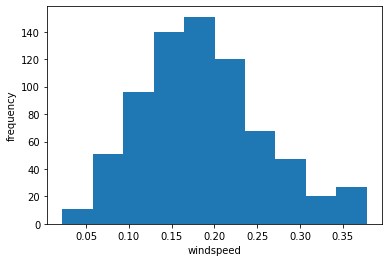

In [26]:
plt.hist(df['windspeed'])
plt.xlabel('windspeed')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

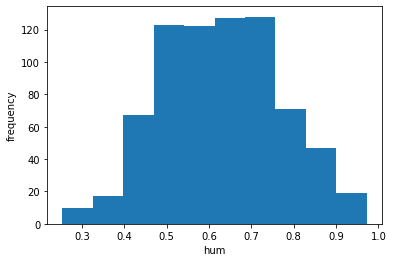

In [27]:
plt.hist(df['hum'])
plt.xlabel('hum')
plt.ylabel('frequency')

<h1>Multicollinearity Analysis</h1>

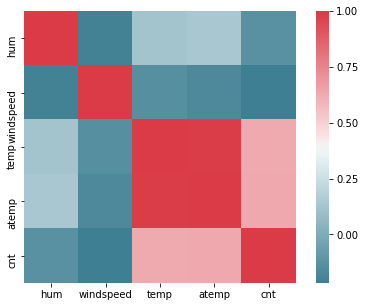

In [28]:
cont =  ["hum", "windspeed","temp","atemp","cnt"]
df_corr = df.loc[:,cont]
f, ax = plt.subplots(figsize=(7, 5))
corr = df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

<h1>Anova test for categorical variables</h1>

In [29]:
cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

Anova_Test_FValue = []
Anova_Test_PValue = []
variable_name_list = []

for variable in cat:
    mod = ols('cnt ~ '+ variable,data = df).fit()
    aov_table = sm.stats.anova_lm(mod,typ=2)
    Fvalue = aov_table.loc[variable, 'F']
    Pvalue = aov_table.loc[variable, 'PR(>F)']
    variable_name_list.append(variable)
    Anova_Test_FValue.append(Fvalue)
    Anova_Test_PValue.append(Pvalue)

Anova_categorical_variable_test = pd.DataFrame({"Variable": variable_name_list, "FValue": Anova_Test_FValue, "PValue": Anova_Test_PValue})   

Anova_categorical_variable_test

,Variable,FValue,PValue
0,season,143.967653,2.133997e-30
1,yr,344.890586,2.483540e-63
2,mnth,62.004625,1.243112e-14
3,holiday,3.421441,6.475936e-02
4,weekday,3.331091,6.839081e-02
5,workingday,2.736742,9.849496e-02
6,weathersit,70.729298,2.150976e-16


In [30]:
#Drop date variable as it won't have impact on our predictions
df = df.drop(['dteday'], axis=1)
#Drop atemp as it is collinear to temp
df = df.drop(['atemp'], axis=1)
#Drop the below three variables as they did not pass the anova test due to p-value greater than 0.05
df = df.drop(['holiday', 'weekday','workingday'], axis=1)

#Compute dummy values for categorical variables
df_mnth = pd.get_dummies(df['mnth'])
df_mnth.rename(columns={1: "mnth_1", 2: "mnth_2", 3: "mnth_3",4: "mnth_4", 5: "mnth_5", 6: "mnth_6",7: "mnth_7",8: "mnth_8",9: "mnth_9",10: "mnth_10",11: "mnth_11",12: "mnth_12"} ,inplace = True)

df_season = pd.get_dummies(df['season'])
df_season.rename(columns={1: "season_1", 2: "season_2", 3: "season_3",4: "season_4"} ,inplace = True)

df_weathersit = pd.get_dummies(df['weathersit'])
df_weathersit.rename(columns={1: "weathersit_1", 2: "weathersit_2", 3: "weathersit_3"} ,inplace = True)

df = pd.concat([df_mnth,df_season,df_weathersit,df] ,axis=1)
df= df.drop(['mnth','mnth_1'],axis=1)
df= df.drop(['season','season_1'],axis=1)
df= df.drop(['weathersit','weathersit_1'],axis=1)




In [31]:
#Dropped the below variables after using backward elimination technique for feature selection
df = df.drop(['hum','mnth_7','mnth_11','mnth_12','windspeed'], axis = 1)

In [32]:
import statsmodels.api as sm

model = sm.OLS(df.iloc[:,15], df.iloc[:,0:15]).fit()
#Summary of the final model
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1672.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:49:58   Log-Likelihood:                         -5939.0
No. Observations:                 731   AIC:                                  1.191e+04
Df Residuals:                     716   BIC:                                  1.198e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
mnth_2         350.5939    129.620      2.705      0.007      96.114     605.074
mnth_3         697.0728    137.354      5.075      0.000     427.407     966.738
mnth_4         486.0847    199.936      2.431      0.015      93.554     878.615
mnth_5         680.9114    207.144      3.287      0.001     274.230    1087.593
mnth_6         561.6652    174.160      3.225      0.001     219.739     903.591
mnth_8         394.7567    140.899      2.802      0.005     118.133     671.380
mnth_9         923.0529    130.372      7.080      0.000     667.095    1179.010
mnth_10        502.8443    133.483      3.767      0.000     240.779     764.910
season_2       910.1045    176.049      5.170      0.000     564.470    1255.739
season_3       883.6665    175.977      5.021      0.000     538.174    1229.159
season_4      1681.0749    118.228     14.219      0.000    1448.960    1913.190
weathersit_2  -621.5001     64.206     -9.680      0.000    -747.554    -495.446
weathersit_3 -2433.8671    185.748    -13.103      0.000   -2798.543   -2069.191
yr            2089.8016     60.647     34.459      0.000    1970.735    2208.868
temp          4983.9783    242.443     20.557      0.000    4507.995    5459.962
==============================================================================
Omnibus:                      124.870   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.416
Skew:                          -0.892   Prob(JB):                     1.44e-68
Kurtosis:                       5.660   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>Modelling and Validation</h1>

<h3>Linear Regression</h3>

R Square: 0.8135843193760934
MAPE: 21.5957558480882
Cross-validated score: 0.6238033179206157


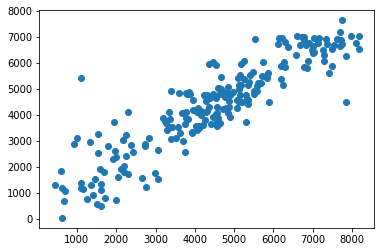

In [33]:
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)
lm = linear_model.LinearRegression()
model_LR = lm.fit(train.iloc[:,0:15], train.iloc[:,15])
predictions_LR = lm.predict(test.iloc[:,0:15])

def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape


print('R Square:',r2_score(test.iloc[:,15], predictions_LR))
print('MAPE:',MAPE(test.iloc[:,15], predictions_LR))
scores = cross_val_score(model_LR, df.iloc[:,0:15],df.iloc[:,15], cv=4)
print('Cross-validated score:', scores.mean())
plt.scatter(test.iloc[:,15], predictions_LR);

<h3>Decision Tree Regression</h3>

R Square: 0.7392662533345244
MAPE: 27.632326476751835
Cross-validated score: 0.023391344217163018


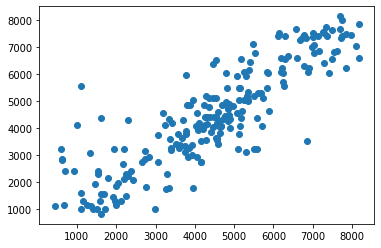

In [34]:
from sklearn.tree import DecisionTreeRegressor

fit_DT = DecisionTreeRegressor().fit(train.iloc[:,0:15], train.iloc[:,15])
predictions_DT = fit_DT.predict(test.iloc[:,0:15])

print('R Square:',r2_score(test.iloc[:,15], predictions_DT))
print('MAPE:',MAPE(test.iloc[:,15], predictions_DT))
scores = cross_val_score(fit_DT, df.iloc[:,0:15],df.iloc[:,15], cv=4)
print('Cross-validated score:', scores.mean())
plt.scatter(test.iloc[:,15], predictions_DT);

<h3>Random Forest Regression</h3>

R Square: 0.8087435922964563
MAPE: 23.98732354769771
Cross-validated score: 0.3632399905834791


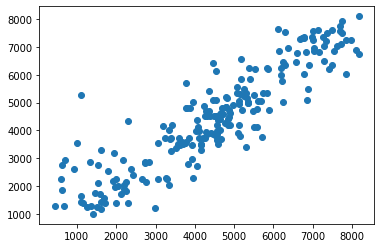

In [35]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor(n_estimators = 100) 
fit_RF = regressor.fit(train.iloc[:,0:15], train.iloc[:,15])
predictions_RF = fit_RF.predict(test.iloc[:,0:15])

print('R Square:',r2_score(test.iloc[:,15], predictions_RF))
print('MAPE:',MAPE(test.iloc[:,15], predictions_RF))
scores = cross_val_score(fit_RF, df.iloc[:,0:15],df.iloc[:,15], cv=4)
print('Cross-validated score:', scores.mean())
plt.scatter(test.iloc[:,15], predictions_RF);